# Features retrieval

## Instruments used

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import pickle
from os import path, listdir
from essentia.standard import MonoLoader, OnsetDetection
from essentia.standard import Energy, ZeroCrossingRate
from essentia.standard import FFT, Centroid, Spectrum, CentralMoments, DistributionShape, Windowing
from IPython.display import Audio
from ipywidgets import FloatProgress
from matplotlib.colors import ListedColormap
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Theory used

### FFT
### Windowing
### Central Moments
### Centroid
### Variance, skewness and kurtosis

## The data

Let's separete two instruments from the training to see if we can use the stated features. First, we need to retrieve the waveforms from files and define the functions to extract features.

In [2]:
fr = 44100.0
list_of_inst = ['cel', 'cla', 'flu', 'gac', 'gel', 'org', 'pia', 'sax', 'tru', 'vio']
list_for_try = ['pia', 'vio']

In [3]:
window = Windowing()
zcr = ZeroCrossingRate()
energy = Energy()
spectrum = Spectrum()
centroid = Centroid()
cm = CentralMoments()
dshape = DistributionShape()

def get_features(audio, fr = 44100., fs = 0.2):
    frame = audio[:int(fr * fs)]
    spec = spectrum(window(frame))
    res = [zcr(frame), energy(frame), centroid(spec)]
    res.extend(dshape(cm(spec)))
    return res

In [5]:
with open('pia', 'r') as ftr:
    pia = pickle.load(ftr)

In [6]:
pia_features = []

for audio in pia:
    pia_features.append(get_features(audio))
    
pia = None
        
print np.asmatrix(pia_features)[:2]

[[  3.67346928e-02   1.39537781e+02   1.01996377e-01   2.22164020e-02
    2.26412487e+00   4.70937872e+00]
 [  2.93650795e-02   6.72983246e+01   3.70785333e-02   1.66763924e-03
    4.91376400e+00   5.14497337e+01]]


In [7]:
with open('vio', 'r') as ftr:
    vio = pickle.load(ftr)

In [8]:
vio_features = []

for audio in vio:
    vio_features.append(get_features(audio))
    
vio = None
        
print np.asmatrix(vio_features)[:2]

[[  6.80272132e-02   3.67446175e+01   1.02370612e-01   1.55393668e-02
    2.17028069e+00   5.09216976e+00]
 [  1.10544220e-01   1.88096607e+00   1.94711447e-01   2.94346716e-02
    1.05395579e+00   3.32165480e-01]]


In [11]:
labels = np.hstack([np.zeros(len(pia_features)), np.ones(len(vio_features))])

print labels

[ 0.  0.  0. ...,  1.  1.  1.]


In [15]:
feature_table = np.vstack([pia_features, vio_features])

print feature_table.shape

(1301, 6)


In [16]:
dataset = pd.DataFrame.from_records(feature_table,
                                    columns = ['ZCR', 'Energy', 'Centroid', 'Variance', 'Skewness', 'Kurtosis'])
dataset['Label'] = labels

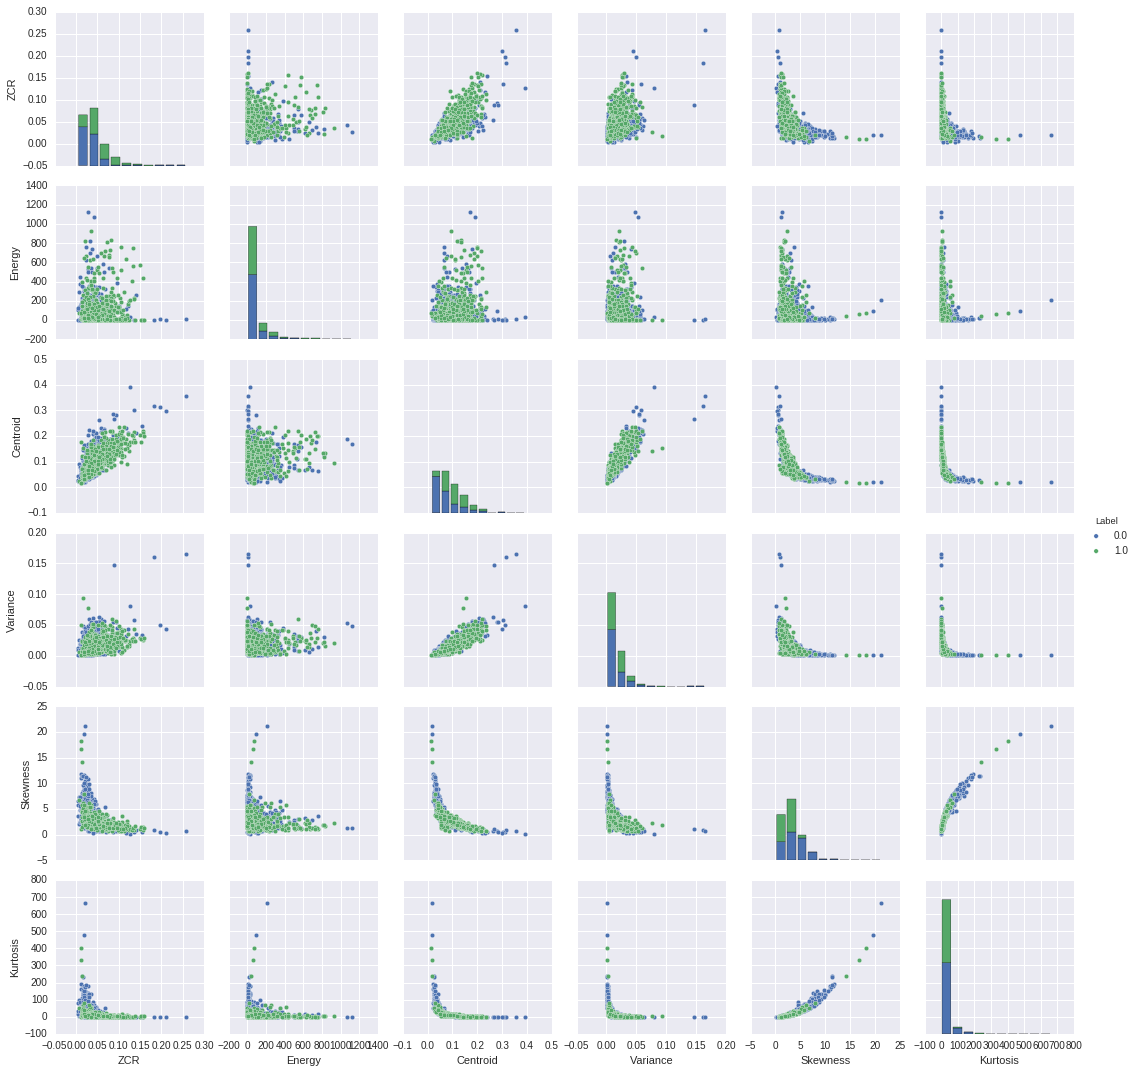

In [19]:
sns.pairplot(dataset, hue = 'Label', vars = ['ZCR', 'Energy', 'Centroid', 'Variance', 'Skewness', 'Kurtosis'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8afb4a2d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc8ae6c7710>]], dtype=object)

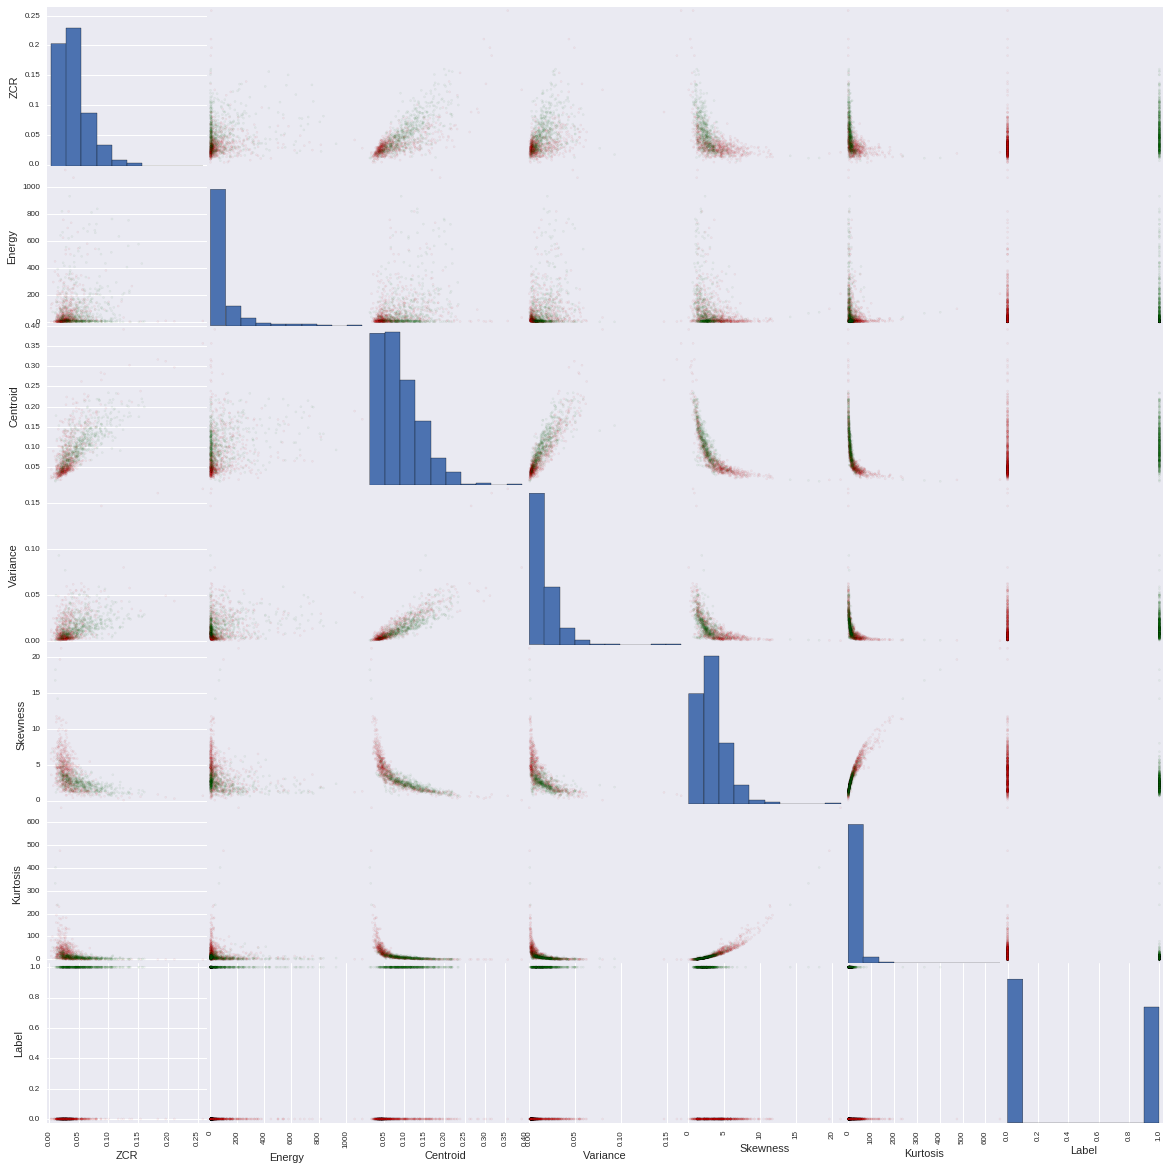

In [34]:
pd.scatter_matrix(dataset, figsize=[20, 20], c = dataset['Label'], cmap = ListedColormap(['red', 'green']), alpha = 0.05)

We conclude that the classes overlap a lot and we need to use multi-label classification and techniques to fight overlapping.